Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np  # Для математических операций
import matplotlib.pyplot as plt  # Для визуализации
from scipy.stats import norm  # Для работы с нормальным распределением
from statsmodels.stats.proportion import proportions_ztest  # Для Z-теста

Загрузка данных из CSV-файла

In [ ]:
df = pd.read_csv('ab_data.csv')

Проверка данных на пропущенные значения

In [ ]:
print(df.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


Проверка на дубликаты

In [ ]:
print(df.duplicated().sum())

0


Распределение пользователей по группам

In [ ]:
print("\nРаспределение по группам:")
value_counts=df['group'].value_counts()
print(value_counts)


Распределение по группам:
group
treatment    147276
control      147202
Name: count, dtype: int64


Разделение данных на контрольную и тестовую группы

In [ ]:
group_a = df[df['group'] == 'control']
group_b = df[df['group'] == 'treatment']

Расчет конверсии для каждой группы (в процентах)

In [ ]:
conversion_a = group_a['converted'].mean() * 100
conversion_b = group_b['converted'].mean() * 100

Размеры групп

In [ ]:
n1 = len(group_a)
n2 = len(group_b)

Количество конверсий в каждой группе

In [ ]:
x1 = group_a['converted'].sum()
x2 = group_b['converted'].sum()

Объединенная доля конверсий

In [ ]:
p= (x1 + x2) / (n1 + n2)

Расчет Z-статистики вручную по формуле

In [ ]:
z_test =(conversion_a/100 -conversion_b/100) / (numpy.sqrt((p* (1 - p) * (1/n1 + 1/n2) )))

Расчет p-value (двусторонний тест)

In [ ]:
p_value = 2 * (1 - norm.cdf(abs(z_test)))

Вывод результатов

In [ ]:
p_value = 2 * (1 - norm.cdf(abs(z_test)))
print(f"Конверсия в A: {conversion_a:.2f}%")
print(f"Конверсия в B: {conversion_b:.2f}%")
print()
print(f"Объединённая доля (p): {p:.4f}")
print(f"Размеры групп: n1={n1}, n2={n2}")
print(f"Z-статистика: {z_test:.3f}")
print (f"p_value: {p_value:.4f}")

Конверсия в A: 12.04%
Конверсия в B: 11.89%

Объединённая доля (p): 0.1197
Размеры групп: n1=147202, n2=147276
Z-статистика: 1.237
p_value: 0.2161


Визуализация результатов

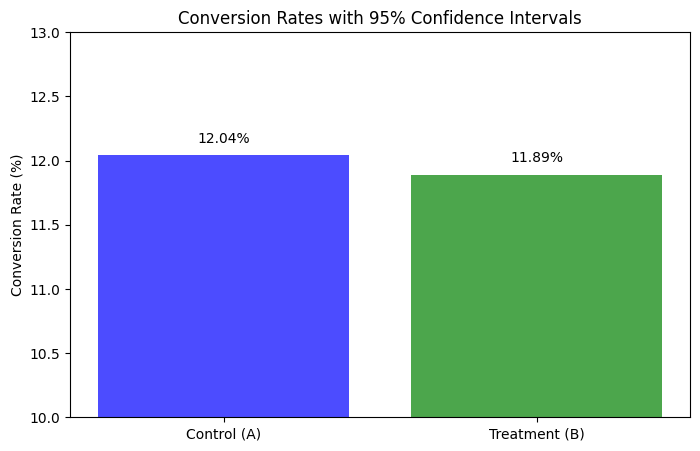

In [ ]:
groups = ['Control (A)', 'Treatment (B)']
conversions = [round(conversion_a,2), round(conversion_b,2)]
plt.figure(figsize=(8, 5))
plt.bar(groups, conversions, color=['blue', 'green'], alpha=0.7)
plt.errorbar(groups, conversions, fmt='none', color='black', capsize=10)
plt.title('Conversion Rates with 95% Confidence Intervals')
plt.ylabel('Conversion Rate (%)')
plt.ylim(10, 13)

for i, conv in enumerate(conversions):
    plt.text(i, conv + 0.1, f"{conv}%", ha='center')

plt.show()

Сохранение результатов в CSV-файл

In [ ]:
results = pd.DataFrame({
    'Metric': ['Conversion A', 'Conversion B', 'p-value', 'Total Users'],
    'Value': [round(conversion_a,2),round(conversion_b,2) , p_value, len(df)]
})
results.to_csv('ab_test_results.csv', index=False)
print("\nРезультаты сохранены в файл 'ab_test_results.csv'")


Результаты сохранены в файл 'ab_test_results.csv'


**Отчет:**

---


Цель: Определить, увеличивает ли новая версия лендинга конверсию в покупку.
Гипотеза: Конверсия в группе B (новая версия) будет выше на 2%.
Датасет: E-commerce A/B Test (294,478 наблюдений): https://www.kaggle.com/datasets/zhangluyuan/ab-testing?resource

Распределение групп:

Контроль (A): 147,202 пользователей

Тест (B): 147,276 пользователей

Данные сбалансированны и нормальны (программа показала отсутсвие пустых значений, дубликатов и выбросов).

Метрики:

-CR для расчета конверсии в покупку;

-p-value для понимания,насколько статистически значимы различия между двумя группами.

Z-test используется по прчиине бинарности выборки.

Результаты:

Конверсия в A: 12.04%

Конверсия в B: 11.89%

Z-статистика: 1.237

p_value: 0.2161


---


Вывод:
Нет статистической значимости: p-value > 0.05 → разница могла возникнуть случайно.Абсолютная разница (0.15%) не имеет бизнес-ценности.Достоверность результатов:

-большая выборка (>147k пользователей на группу);

-чистые данные (без пропусков/дубликатов)

-корректный метод анализа (Z-тест для бинарных данных)

---



Рекомендации: Отклонить новую версию лендинга -следует направить ресурсы на другие гипотезы

